In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd

# Electoral Results

In [17]:
dip = pd.read_excel('../raw_data/Election_Results_2018/NL_DIPUT_LOC_2018.xlsm')

In [18]:
dip.columns

Index([' CLAVE_CASILLA', 'CLAVE_ACTA', 'ID_ESTADO', 'ESTADO',
       'ID_DISTRITO_LOCAL', 'DISTRITO_LOCAL', 'SECCION', 'ID_CASILLA',
       'TIPO_CASILLA', 'EXT_CONTIGUA', 'UBICACION_CASILLA', 'PAN', 'PRI',
       'PRD', 'PT', 'PVEM', 'MC', 'NAPPN', 'MORENA', 'PES', 'RED',
       'C_PT_MORENA_PES', 'C_PT_MORENA', 'C_PT_PES', 'C_MORENA_PES', 'CI_1',
       'CI_2', 'CI_3', 'CNR', 'Votos Anulados', 'TOTAL_VOTOS_CALCULADO',
       'LISTA_NOMINAL', 'FECHA_HORA_CAPTURA'],
      dtype='object')

In [45]:
dip.to_csv('../raw_data/dip_2018.csv')

In [19]:
muni = pd.read_excel('../raw_data/Election_Results_2018/NL_AYUN_2018.xlsm')

In [20]:
muni.head()

,CLAVE_CASILLA,CLAVE_ACTA,ID_ESTADO,ESTADO,ID_MUNICIPIO,MUNICIPIO,SECCION,ID_CASILLA,TIPO_CASILLA,EXT_CONTIGUA,...,CI_2,CI_3,CI_4,CI_5,CI_6,CNR,Votos Anulados,TOTAL_VOTOS_CALCULADO,LISTA_NOMINAL,FECHA_HORA_CAPTURA
0,190001B0100,190001B01005,19,NUEVO LEON,1,Abasolo,1,1,B,NaN,...,0,0,0,0,0,0,5,353,435,2018-07-04 12:09:56
1,190001C0201,190001C02015,19,NUEVO LEON,1,Abasolo,1,2,C,1.0,...,0,0,0,0,0,1,6,325,434,2018-07-04 12:11:31
2,190002B0100,190002B01005,19,NUEVO LEON,1,Abasolo,2,1,B,NaN,...,0,0,0,0,0,0,20,534,710,2018-07-04 12:12:38
3,190002C0201,190002C02015,19,NUEVO LEON,1,Abasolo,2,2,C,1.0,...,0,0,0,0,0,0,23,522,709,2018-07-04 12:14:12
4,190003B0100,190003B01005,19,NUEVO LEON,2,Agualeguas,3,1,B,NaN,...,0,0,0,0,0,0,5,335,414,2018-07-04 10:53:05


In [46]:
muni.to_csv('../raw_data/muni_2018.csv')

# Economic Census

In [21]:
eco = pd.read_csv('../raw_data/Census_Eco_2019 /ce2019_nl.csv')

/Users/nicolaspoylo/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [22]:
eco.head()

,ENTIDAD,MUNICIPIO,CODIGO,ID_ESTRATO,UE,A111A,A121A,A131A,A211A,A221A,...,A256A,A433A,A434A,A436A,A529A,A534A,A747A,A748A,A752A,A764A
19,,,NaN,151448,2195663.395,1322881.181,872782.214,51952.108,51716.343,214243.729,...,180.810,94.849,1430677.699,7.749,30.102,390.233,624.484,115.080,35.866,NaN
19,,,1.0,134527,177892.013,69087.968,108804.045,-656.708,2660.336,63885.592,...,189.351,96.347,774045.949,8.097,44.672,244.605,320.499,151.943,44.285,NaN
19,,,2.0,12481,195644.861,94364.212,101280.649,2762.641,4075.900,56941.757,...,158.627,96.237,1372785.008,7.347,30.665,239.635,359.363,94.499,36.126,NaN
19,,,3.0,3423,405439.706,230244.418,175195.288,9685.140,8897.832,71759.615,...,168.384,94.108,1597661.030,8.387,31.195,311.924,483.604,106.532,33.078,NaN
19,,,4.0,1017,1416686.815,929184.583,487502.232,40161.035,36082.275,21656.765,...,191.111,94.519,1655494.243,7.540,27.320,418.393,638.856,117.421,33.437,NaN


In [23]:
eco.columns

Index(['ENTIDAD', 'MUNICIPIO', 'CODIGO', 'ID_ESTRATO', 'UE', 'A111A', 'A121A',
       'A131A', 'A211A', 'A221A',
       ...
       'A256A', 'A433A', 'A434A', 'A436A', 'A529A', 'A534A', 'A747A', 'A748A',
       'A752A', 'A764A'],
      dtype='object', length=186)

# Households & Population Census

In [32]:
pob = pd.read_csv("../raw_data/Census_Socio_2020/RESAGEBURB_19CSV20.csv")

In [38]:
pob_ = pob[['ENTIDAD', 'NOM_ENT', 'MUN', 'NOM_MUN', 'LOC', 'NOM_LOC', 'AGEB', 'MZA','POBTOT','POBFEM','POBMAS','P_3A5','P_6A11','PCON_DISC','PCLIM_PMEN','PCDISC_MOT','P3A5_NOA','P6A11_NOA','P8A14AN','P15SEC_INM','P18A24A','PEA','PDESOCUP','PSINDER','PDER_IMSS','PDER_ISTE','PDER_SEGP','PAFIL_IPRIV','PCATOLICA']]

In [36]:
pob_.head()

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,...,P6A11_NOA,P8A14AN,PEA,PDESOCUP,PSINDER,PDER_IMSS,PDER_ISTE,PDER_SEGP,PAFIL_IPRIV,PCATOLICA
0,19,Nuevo León,0,Total de la entidad Nuevo León,0,Total de la entidad,0000,0,5784442,2893492,...,22177,10547,2862003,54554,1072664,3596116,178747,558212,330130,4492947
1,19,Nuevo León,1,Abasolo,0,Total del municipio,0000,0,2974,1532,...,22,3,1130,37,141,1783,62,752,218,2264
2,19,Nuevo León,2,Agualeguas,0,Total del municipio,0000,0,3382,1692,...,7,3,1322,20,328,944,111,1803,102,2827
3,19,Nuevo León,3,Los Aldamas,0,Total del municipio,0000,0,1407,708,...,5,*,535,11,320,71,17,963,7,1281
4,19,Nuevo León,4,Allende,0,Total del municipio,0000,0,35289,17460,...,251,76,17028,134,4420,21907,845,6498,1324,28852


In [47]:
pob.to_csv("../raw_data/pob.csv")

In [37]:
viv = pd.read_csv('../raw_data/Census_Socio_2020/RESAGEBURB_19CSV20.csv')

In [39]:
viv.columns

Index(['ENTIDAD', 'NOM_ENT', 'MUN', 'NOM_MUN', 'LOC', 'NOM_LOC', 'AGEB', 'MZA',
       'POBTOT', 'POBFEM',
       ...
       'VPH_TELEF', 'VPH_CEL', 'VPH_INTER', 'VPH_STVP', 'VPH_SPMVPI',
       'VPH_CVJ', 'VPH_SINRTV', 'VPH_SINLTC', 'VPH_SINCINT', 'VPH_SINTIC'],
      dtype='object', length=229)

In [42]:
viv_ = viv[['ENTIDAD', 'NOM_ENT', 'MUN', 'NOM_MUN', 'LOC', 'NOM_LOC', 'AGEB', 'MZA','VIVTOT','VIVPAR_DES','VPH_PISOTI','VPH_S_ELEC','VPH_AGUAFV','VPH_NDEAED','VPH_AUTOM','VPH_BICI','VPH_PC','VPH_CEL','VPH_INTER','VPH_STVP','VPH_SINCINT']]

In [43]:
viv_.head()

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,VIVTOT,VIVPAR_DES,...,VPH_S_ELEC,VPH_AGUAFV,VPH_NDEAED,VPH_AUTOM,VPH_BICI,VPH_PC,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SINCINT
0,19,Nuevo León,0,Total de la entidad Nuevo León,0,Total de la entidad,0000,0,2037695,286185,...,2849,12098,730,967690,190686,791493,1537687,1150914,806584,439479
1,19,Nuevo León,1,Abasolo,0,Total del municipio,0000,0,1194,249,...,3,17,*,485,96,239,746,351,359,399
2,19,Nuevo León,2,Agualeguas,0,Total del municipio,0000,0,2971,832,...,11,12,*,923,238,267,1095,456,814,762
3,19,Nuevo León,3,Los Aldamas,0,Total del municipio,0000,0,1623,753,...,*,12,*,421,111,105,490,120,178,379
4,19,Nuevo León,4,Allende,0,Total del municipio,0000,0,13785,1505,...,7,46,*,8040,1550,4621,9862,6420,6802,3676


In [48]:
viv.to_csv("../raw_data/viv.csv")

# Section shape file

In [92]:
plt.rcParams['figure.figsize'] = (20, 10)

In [85]:
section = gpd.read_file('../raw_data/SECCION_NUEVO_LEON.geojson')

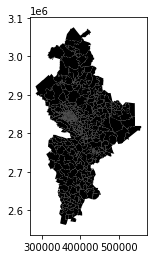

In [96]:
section_map = section.plot(color='black')

# AGEB shape file

In [99]:
ageb = geopandas.read_file('../raw_data/nl_ageb_rural.shx')

DriverError: Unable to open ../raw_data/nl_ageb_rural.shp or ../raw_data/nl_ageb_rural.SHP.

In [97]:
ageb = gpd.read_file('../raw_data/shapefile_ageb/nl_ageb_rural.shp')

DriverError: Unable to open ../raw_data/shapefile_ageb/nl_ageb_rural.shx or ../raw_data/shapefile_ageb/nl_ageb_rural.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.

In [76]:
print(ageb['geometry'])

0      POLYGON ((-99.52103 26.29761, -99.51782 26.291...
1      POLYGON ((-99.61752 26.38824, -99.61675 26.387...
2      POLYGON ((-99.85308 26.37411, -99.85552 26.374...
3      POLYGON ((-99.64101 26.34271, -99.64095 26.342...
4      POLYGON ((-99.75624 26.23286, -99.75483 26.231...
                             ...                        
610    POLYGON ((-100.06554 25.91890, -100.07178 25.9...
611    POLYGON ((-100.29234 25.95766, -100.29219 25.9...
612    POLYGON ((-100.30204 25.85217, -100.30069 25.8...
613    POLYGON ((-100.47918 25.96962, -100.47912 25.9...
614    POLYGON ((-100.39267 25.98715, -100.39224 25.9...
Name: geometry, Length: 615, dtype: geometry


<AxesSubplot:>

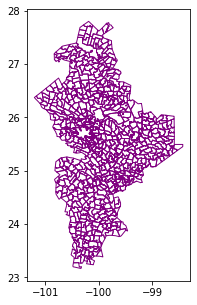

In [62]:
ageb.plot(figsize=(5,5), edgecolor="purple", facecolor="None")

In [90]:
ageb_u = gpd.read_file("../raw_data/nl_ageb_urbana.shx")

DriverError: Unable to open ../raw_data/nl_ageb_urbana.shp or ../raw_data/nl_ageb_urbana.SHP.

<AxesSubplot:>

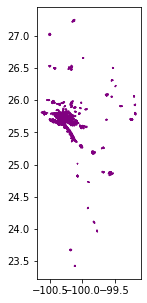

In [65]:
ageb_u.plot(figsize=(5,5), edgecolor="purple", facecolor="None")

In [78]:
import folium

In [79]:
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"
state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"
state_data = pd.read_csv(state_unemployment)

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=state_data,
    columns=["State", "Unemployment"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment Rate (%)",
).add_to(m)

folium.LayerControl().add_to(m)

m

In [82]:
import folium